# Preprocessing and Modeling

**Import Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

**Read in Clean Data**

In [3]:
df_train = pd.read_csv('../data/train_clean.csv')
df_train.set_index('Id', inplace=True)
df_test = pd.read_csv('../data/test_clean.csv')
df_test.set_index('Id', inplace=True)

In [4]:
# check the shape of df_train
df_train.shape

(2051, 74)

In [5]:
# check the shape of df_test
df_test.shape

(878, 73)

In [6]:
df_train.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,...,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,mo sold,yr sold,sale type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,Y,0,44,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,Y,0,74,0,0,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,52,0,0,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,Y,100,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,N,0,59,0,0,0,3,2010,WD,138500


## Feature Engineering

### Create Polynomial Features

Create polynomial features for the following variables: overall qual, gr living area, garage area, overall cond, kitchen abvgr.

In [7]:
# Create a new dataframe to house the variables that will be manipulated
df_train2 = df_train[['overall qual', 'overall cond', 'gr liv area', 'garage area', 'kitchen abvgr']]

In [8]:
df_train2.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr
Id,,,,,
109,6,8,1479,475.0,1
544,7,5,2122,559.0,1
153,5,7,1057,246.0,1
318,5,5,1444,400.0,1
255,6,8,1445,484.0,1


In [9]:
# Instantiate PolynomialFeatures object to create all two-way terms.
polynomial_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [10]:
# Fit and transform our X data.
poly_train = polynomial_features.fit_transform(df_train2)

In [11]:
poly_train.shape

(2051, 20)

In [12]:
# Transform into a dataframe
poly_train = pd.DataFrame(poly_train, columns = polynomial_features.get_feature_names(df_train2.columns), index=df_train2.index)
poly_train.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr,overall qual^2,overall qual overall cond,overall qual gr liv area,overall qual garage area,overall qual kitchen abvgr,overall cond^2,overall cond gr liv area,overall cond garage area,overall cond kitchen abvgr,gr liv area^2,gr liv area garage area,gr liv area kitchen abvgr,garage area^2,garage area kitchen abvgr,kitchen abvgr^2
Id,,,,,,,,,,,,,,,,,,,,
109,6.0,8.0,1479.0,475.0,1.0,36.0,48.0,8874.0,2850.0,6.0,64.0,11832.0,3800.0,8.0,2187441.0,702525.0,1479.0,225625.0,475.0,1.0
544,7.0,5.0,2122.0,559.0,1.0,49.0,35.0,14854.0,3913.0,7.0,25.0,10610.0,2795.0,5.0,4502884.0,1186198.0,2122.0,312481.0,559.0,1.0
153,5.0,7.0,1057.0,246.0,1.0,25.0,35.0,5285.0,1230.0,5.0,49.0,7399.0,1722.0,7.0,1117249.0,260022.0,1057.0,60516.0,246.0,1.0
318,5.0,5.0,1444.0,400.0,1.0,25.0,25.0,7220.0,2000.0,5.0,25.0,7220.0,2000.0,5.0,2085136.0,577600.0,1444.0,160000.0,400.0,1.0
255,6.0,8.0,1445.0,484.0,1.0,36.0,48.0,8670.0,2904.0,6.0,64.0,11560.0,3872.0,8.0,2088025.0,699380.0,1445.0,234256.0,484.0,1.0


In [13]:
# merge the sales column into the dataframe on ID

poly_train2 = pd.merge(poly_train, df_train['saleprice'],
                  left_on='Id',
                  right_on='Id')

In [14]:
# Check merge is correct
poly_train2.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr,overall qual^2,overall qual overall cond,overall qual gr liv area,overall qual garage area,overall qual kitchen abvgr,...,overall cond gr liv area,overall cond garage area,overall cond kitchen abvgr,gr liv area^2,gr liv area garage area,gr liv area kitchen abvgr,garage area^2,garage area kitchen abvgr,kitchen abvgr^2,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,6.0,8.0,1479.0,475.0,1.0,36.0,48.0,8874.0,2850.0,6.0,...,11832.0,3800.0,8.0,2187441.0,702525.0,1479.0,225625.0,475.0,1.0,130500
544,7.0,5.0,2122.0,559.0,1.0,49.0,35.0,14854.0,3913.0,7.0,...,10610.0,2795.0,5.0,4502884.0,1186198.0,2122.0,312481.0,559.0,1.0,220000
153,5.0,7.0,1057.0,246.0,1.0,25.0,35.0,5285.0,1230.0,5.0,...,7399.0,1722.0,7.0,1117249.0,260022.0,1057.0,60516.0,246.0,1.0,109000
318,5.0,5.0,1444.0,400.0,1.0,25.0,25.0,7220.0,2000.0,5.0,...,7220.0,2000.0,5.0,2085136.0,577600.0,1444.0,160000.0,400.0,1.0,174000
255,6.0,8.0,1445.0,484.0,1.0,36.0,48.0,8670.0,2904.0,6.0,...,11560.0,3872.0,8.0,2088025.0,699380.0,1445.0,234256.0,484.0,1.0,138500


### Explore new correlations

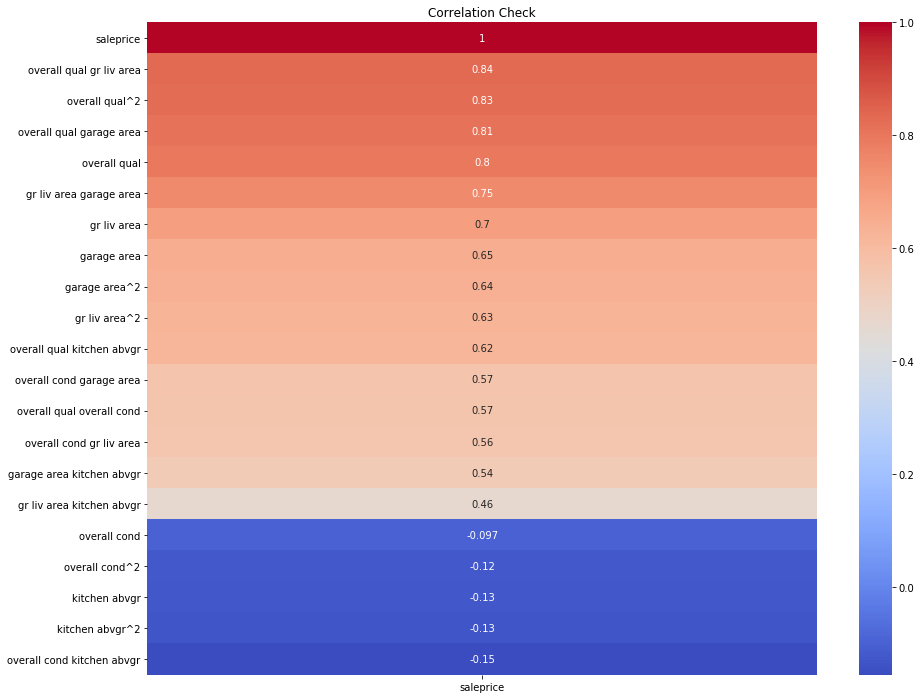

In [15]:
# Which variables have the strongest correlations with saleprice?

fig, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(poly_train2.corr()[['saleprice']].sort_values(by=['saleprice'],
                                                          ascending=False),
            annot=True, 
            ax=ax, 
            cmap='coolwarm')

# Adjust for cut off edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check');

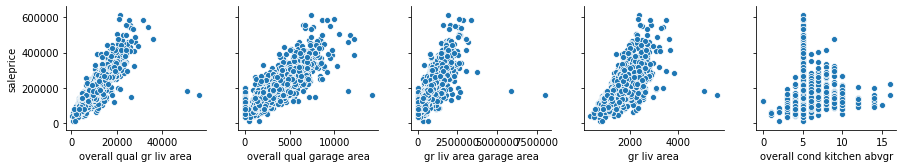

In [21]:
sns.pairplot(data=poly_train2,
                  y_vars=['saleprice'],
                  x_vars=['overall qual gr liv area', 
                          'overall qual garage area', 
                         'gr liv area garage area',
                         'gr liv area',
                         'overall cond kitchen abvgr']);

### Export to csv

In [22]:
poly_train2.to_csv('../data/train_poly.csv')